Q: What is the range of each quantitative predictor? You can answer this using the range() function.

Q: What is the mean and standard deviation of each quantitative predictor?

Q: Now remove the 10th through 85th observations. What is the range, mean, 
    and standard deviation of each predictor in the subset of the data that remains?

In [103]:
#A:
import pandas as pd
import numpy as np

df = pd.read_csv("Auto.csv")

df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Q: Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>,
        <Axes: xlabel='acceleration', ylabel='di

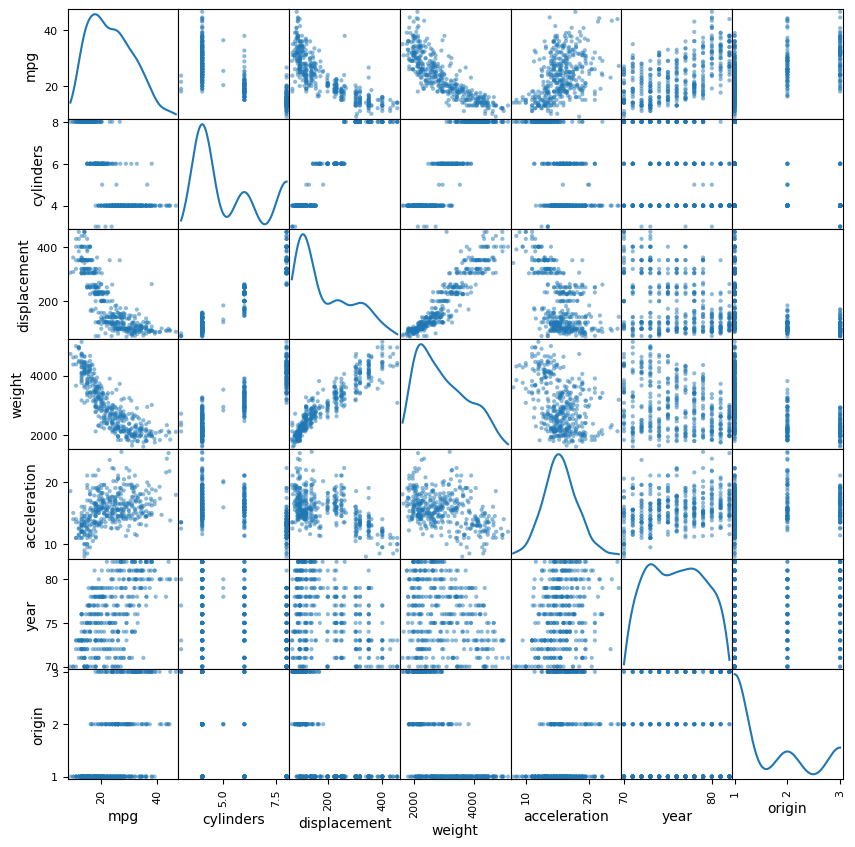

In [104]:
pd.plotting.scatter_matrix(df, diagonal = "kde", figsize = (10,10))

Q: Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

A:In most of the variables a strong relationship between the variables can be seen, as in the case of weight and mpg, the only cases where this is not observed is in the case of acceleration/weight, and in the case of weight/mpg

<Axes: title={'center': 'weight'}, xlabel='origin'>

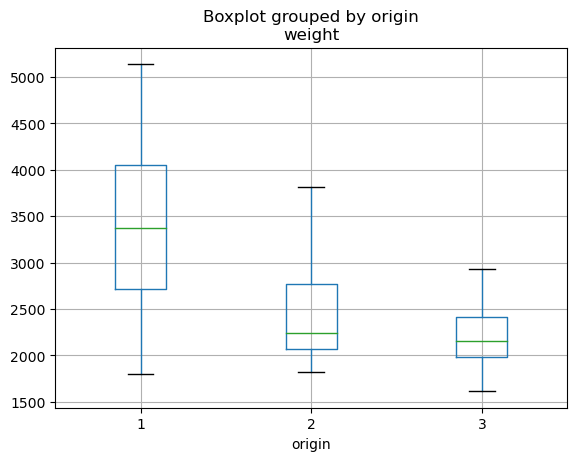

In [105]:
pd.plotting.boxplot(df, column = "weight", by = "origin")

It can be observed how the range of weights for origin 3 and 2 is much narrower than that of origin 1.

<Axes: title={'center': 'mpg'}, xlabel='cylinders'>

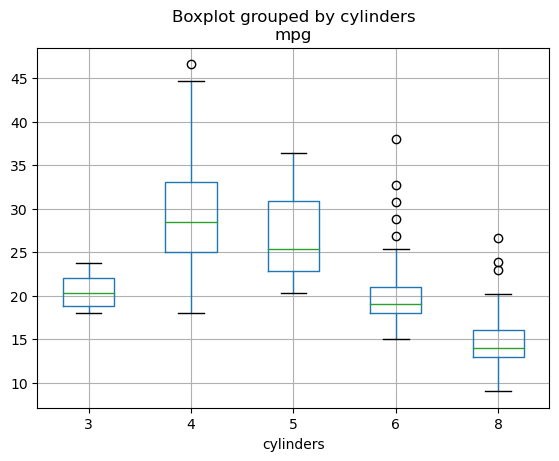

In [106]:
pd.plotting.boxplot(df, column = "mpg", by = "cylinders")

It can be seen how the higher the displacement, the lower the mpg, except for the 3-cylinder.

<Axes: title={'center': 'displacement'}, xlabel='origin'>

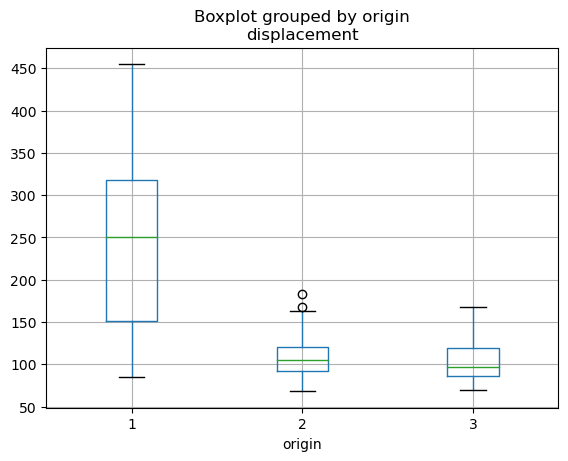

In [107]:
pd.plotting.boxplot(df, column = "displacement", by = "origin")

It can be observed how the range of displacement for origin 3 and 2 is much narrower than that of origin 1.

Q: Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

A:In all quantitative variables, a relationship with mpg can be observed, as seen in the scatter matrix graph.

<Axes: title={'center': 'mpg'}, xlabel='brand'>

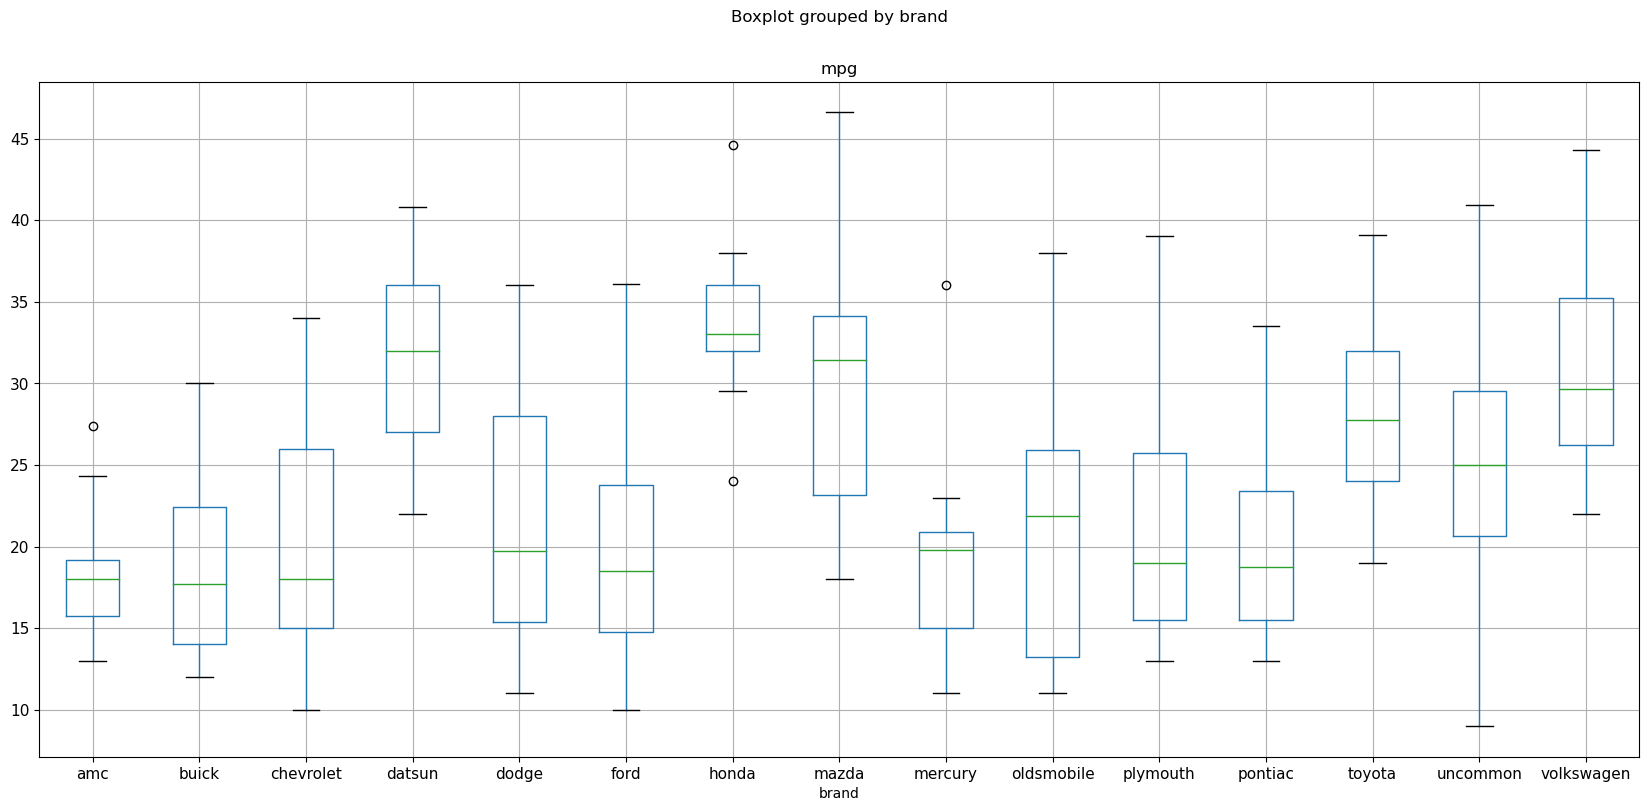

In [108]:
df['brand'] = df['name'].apply(lambda x: x.split()[0])

#Correcting brand names
brand_mapping = {
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'toyouta': 'toyota',
    'chevroelt': 'chevrolet',
    'chevy': 'chevrolet',
    'maxda': 'mazda'
}
df['brand'] = df['brand'].replace(brand_mapping)

#Grouping the brands among the 9 most repeated
brand_counts = df['brand'].value_counts()
uncommon_brands = brand_counts.index[brand_counts < 9]
df.loc[df['brand'].isin(uncommon_brands), 'brand'] = 'uncommon'

pd.plotting.boxplot(df, column = "mpg", by = "brand", fontsize = 11, figsize = (20,9))

It can be seen how brands like Datsun or Honda have a higher mpg